# STEP 1: IMPORTING THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 

# STEP 2: LOADING THE DATASET

In [2]:
train=pd.read_csv('fashion-mnist_train.csv')

In [3]:
test=pd.read_csv('fashion-mnist_test.csv')

In [4]:
train.shape #60,000 samples

(60000, 785)

In [5]:
test.shape #10,000 samples

(10000, 785)

In [6]:
train.head() 
# the image information is stored as pixels
# the size of the image is 28*28 ->784 pixels.
#the first column "label" tells us the class
# here we have ten classes/categories of items

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


the ten categories are:
#Remember the 10 classes decoding is as follows:
#0 => T-shirt/top
#1 => Trouser
#2 => Pullover
#3 => Dress
#4 => Coat
#5 => Sandal
#6 => Shirt
#7 => Sneaker
#8 => Bag
#9 => Ankle boot


In [7]:
#creating the np. arrays of the train and test sets.
train_np=np.array(train,dtype='float32')
test_np=np.array(test,dtype='float32')

In [33]:
test_np[1] #viewing the dataset.

array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 209., 190., 181., 150., 170., 193., 180., 219.,   5.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  24., 235., 210., 241., 222.,
       171., 220., 199., 236.,  27.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0., 103., 227., 217., 218., 222., 189., 216., 201., 215., 103.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 197., 221., 201., 212.,
       215., 211., 215., 210., 228., 174.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 206., 202., 193., 202., 210., 209., 214., 193., 151.,
       132.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

# STEP 3: VISUALIZING THE DATASET

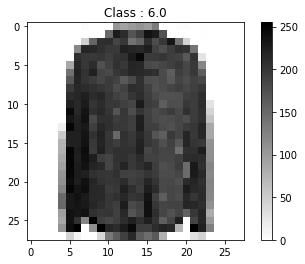

In [9]:
#visualizing the images from the pixel information.
plt.imshow(train_np[2,1:].reshape(28,28),cmap='binary')
#since the label at the 0th column position is included we need to consider from 1
plt.title('Class : {}'.format(train_np[2,0]))
plt.colorbar() # as you see the pixel information ranges from 0-255.

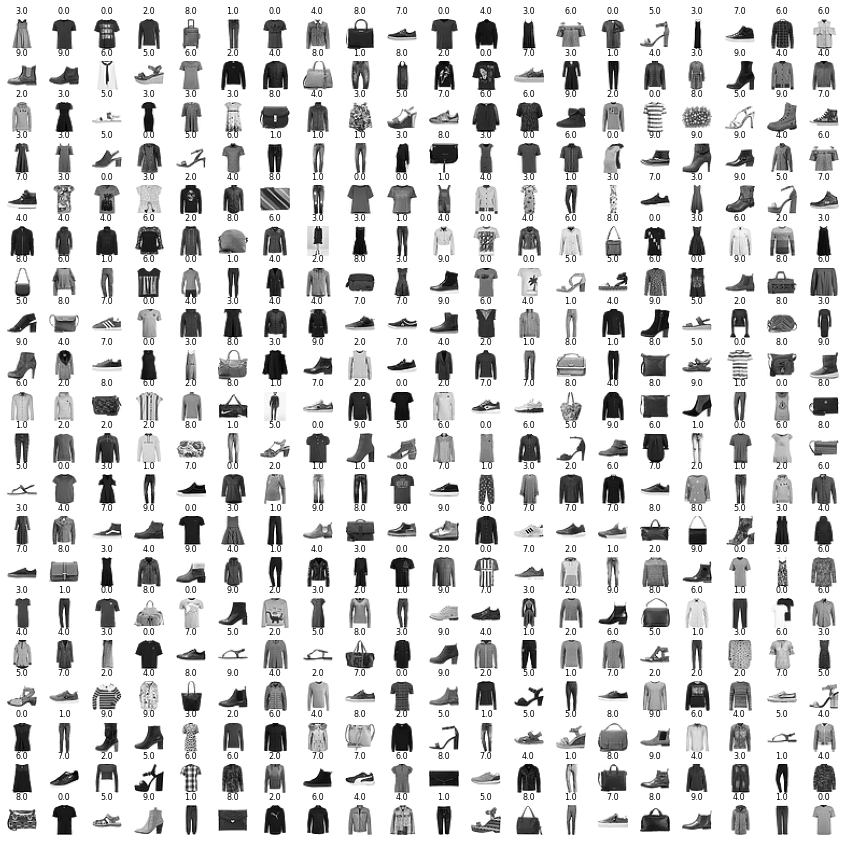

In [10]:
#visualizing few random images from the pool of 60k samples
L,W=20,20 #viewing 400 images
#creating a sub plot
fig, axes=plt.subplots(L,W,figsize=(15,15))
axes=axes.ravel() #making it linear
n=len(train_np) #length of the np array
for i in range(L*W):
    r=random.randint(0,n) #generating a random integer
    axes[i].imshow(train_np[r,1:].reshape(28,28),cmap='binary') #showing the random sample
    #to see b&w images use cmap='binary'
    axes[i].set_title(train_np[r,0],fontsize=8)
    axes[i].axis('off') #make sure to keep the axis off else the entire output will be messed up

plt.subplots_adjust(hspace=0.4) #to ensure there is a space between images.


# STEP 4: PRE-PROCESSING THE DATA

In [11]:
#SPLITTING THE TRAIN_NP TO INDEPENDANT AND DEPENDENDANT DATASETS
X=train_np[:,1:]/255 #scaling the dataset and bringing the data to one scale.
y=train_np[:,0] # taking the target column
X_test=test_np[:,1:]/255 #copying all the input columns except the label
y_test=test_np[:,0] #copying only label


In [12]:
# we are creating a "cross-validation" set to gneralize the model
from sklearn.model_selection import train_test_split
X_train,X_cv,y_train,y_cv=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
len(X_train) # training set

48000

In [14]:
len(X_cv) #cross _validation set

12000

In [15]:
len(X_test)

10000

#we need to import keras as we are working on a neural n/w model.
#if you have not installed "tensorflow" and "keras"
#installing it using pip might give u problems
#so, please use anaconda and install them anaconda navigator.
#link: Tutorial 1 - Setup of Tensorflow and keras https://youtu.be/yFrc2SCdW7w
#all credits to the "Kindson The Genius"

In [16]:
X_train.shape[0] #we need to re shape out inputs into 28*28*1

48000

In [17]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_cv = X_cv.reshape(X_cv.shape[0], *(28, 28, 1))


In [18]:
X_train.shape

(48000, 28, 28, 1)

# STEP 5: PREPARING THE MODEL

In [19]:
import keras

Using TensorFlow backend.


In [20]:
#make all the necessary imports once and for all 
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [59]:
# now just like creating object for LinearRegression(), we created a object for neural network model 
model=Sequential()
#We can't send a whole 28*28 image as an input to the neural network model

#Creating a input layer
    
#Conv2D is a Feature Detector and generates Feature Maps
#the model generates 32 feature maps of size 3*3 (kernel size) and the stride is 1,1
model.add(Conv2D(64,3,3,input_shape=(28,28,1),activation='relu'))  #first use 32 later 64

#Maxpooling2D is down sampler that is used to enhance the prominent features using max poling technique.
model.add(MaxPooling2D(pool_size=(2,2)))

#Faltten is to generate a one dimensional array from a 2*2 down sampler output
model.add(Flatten())
        


C:\Users\BHAVANABhavana\Anaconda3\envs\TensorFlow and Keras\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  if __name__ == '__main__':


In [67]:
#Model layers:
# Dense helps us in creating the hidden and output layers.

model.add(Dense(output_dim=32,activation='relu')) #hidden layer

#output dim is 10, because we have 10 classes to predict
model.add(Dense(output_dim=10,activation='sigmoid')) #output layer 
#remeber the activaltion function is "sigmoid"

#drop outs are used to drop the units from the network -- manily used for enhancing the model performance.
model.add(Dropout(0.25))

C:\Users\BHAVANABhavana\Anaconda3\envs\TensorFlow and Keras\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  after removing the cwd from sys.path.
C:\Users\BHAVANABhavana\Anaconda3\envs\TensorFlow and Keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  import sys


In [68]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [69]:
#now our model is ready to learn the data
iteration=50
model.fit(X_train,y_train,batch_size=512,epochs=iteration,validation_data=(X_cv,y_cv))

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 34s 702us/step - loss: 5.6854 - accuracy: 0.2640 - val_loss: 1.8286 - val_accuracy: 0.3949
Epoch 2/50
48000/48000 [==============================] - 33s 683us/step - loss: 4.7999 - accuracy: 0.4053 - val_loss: 1.3727 - val_accuracy: 0.7655
Epoch 3/50
48000/48000 [==============================] - 33s 678us/step - loss: 2.6216 - accuracy: 0.3778 - val_loss: 1.3975 - val_accuracy: 0.7210
Epoch 4/50
48000/48000 [==============================] - 32s 676us/step - loss: 2.1701 - accuracy: 0.4431 - val_loss: 1.1637 - val_accuracy: 0.7626
Epoch 5/50
48000/48000 [==============================] - 32s 677us/step - loss: 1.9913 - accuracy: 0.4818 - val_loss: 0.9698 - val_accuracy: 0.7717
Epoch 6/50
48000/48000 [==============================] - 33s 684us/step - loss: 1.8802 - accuracy: 0.4878 - val_loss: 0.8483 - val_accuracy: 0.7874
Epoch 7/50
48000/48000 [==============================] 

# STEP 5: EVALUATING THE MODEL

In [28]:
evaluate=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 2s 186us/step


In [29]:
print('Test Accuracy: {:.5f}'.format(evaluate[1]))

Test Accuracy: 0.90650


In [39]:
y_pred=model.predict_classes(X_test) #remember to user predict class function instead of predict method

In [42]:
len(y_pred)

10000

#Before improvising the model:
train set accuracy           : 94.1%
cross validation set accuracy: 90.62%
test set accuracy            : 90.6%

# STEP 6: VISIUALIZING THE TEST SET RESULTS

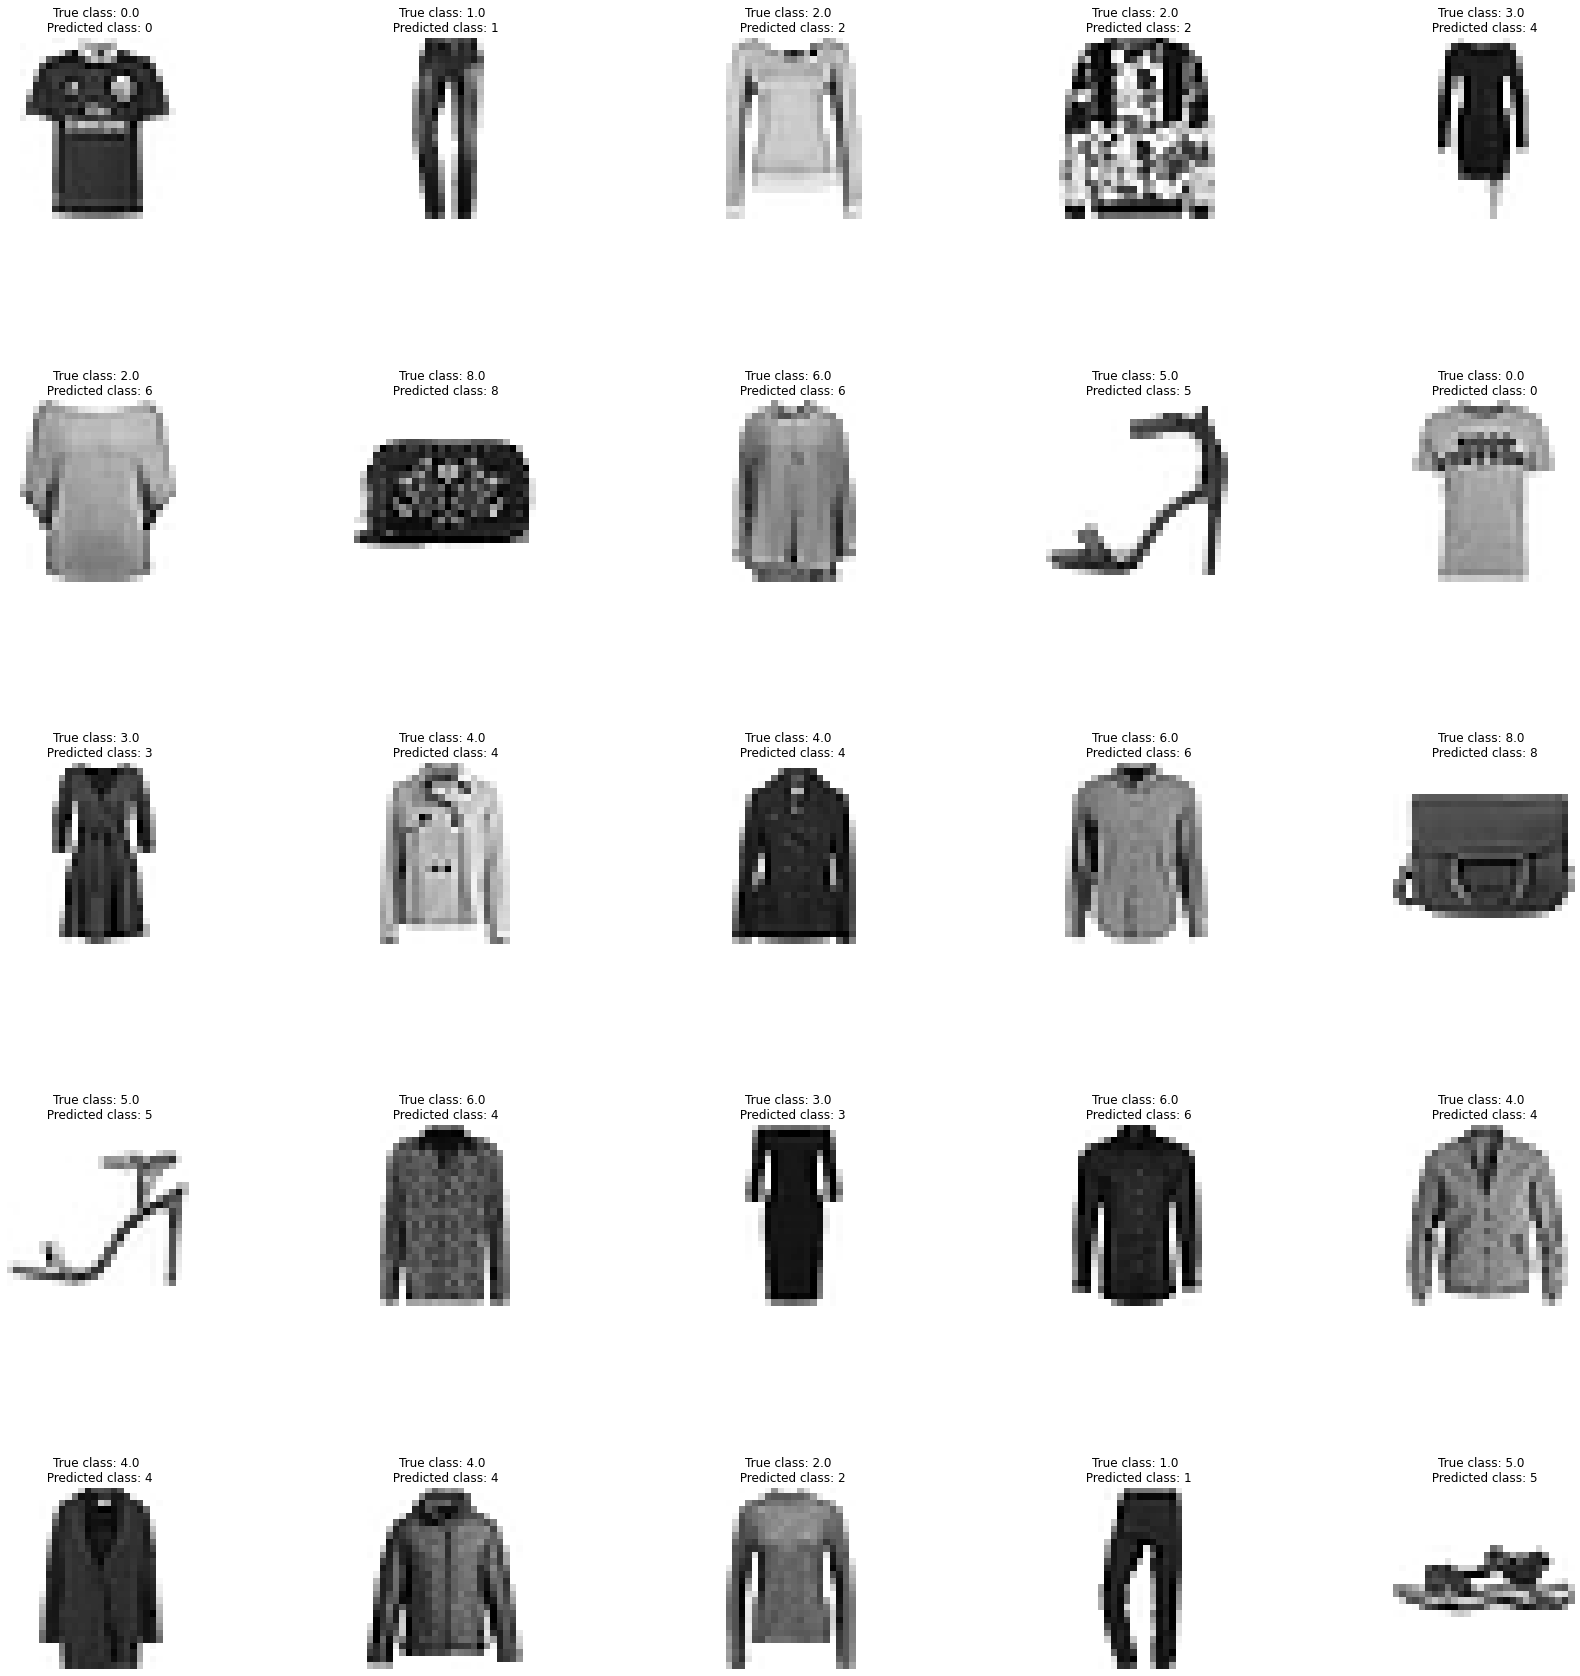

In [47]:
#just like before we are plotting a sub plot visulaizing 400 images from the test set
L,W=5,5 #dimensions of the plots
fig,axes=plt.subplots(L,W,figsize=(30,30))
axes=axes.ravel()
t=len(X_test) #length of the test set

for i in range(L*W): #400 images
    axes[i].imshow(test_np[i,1:].reshape(28,28),cmap='binary') #we are using test_np as we have scaled our X_test array.
    axes[i].set_title('True class: {} \n Predicted class: {}'.format(y_test[i],y_pred[i]))
    axes[i].axis('off')

plt.subplots_adjust(hspace=1)

In [51]:
class_names=[ 'Class 0: T-shirt/top', 'Class 1: Trouser', 'Class 2: Pullover', 'Class 3: Dress', 'Class 4: Coat',\
             'Class 5: Sandal','Class 6: Shirt','Class 7: Sneaker','Class 8: Bag','Class 9: Ankle boot']

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

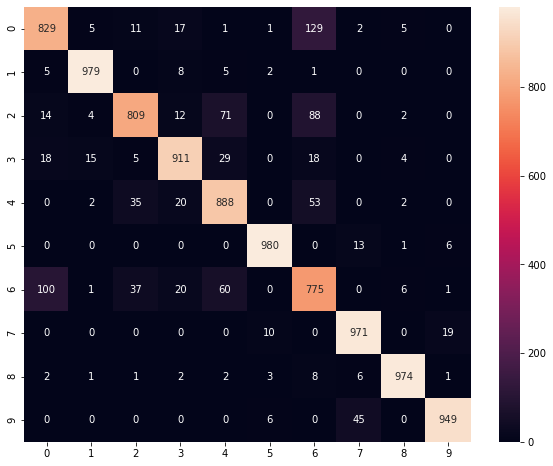

In [56]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='0g')

In [52]:
print(classification_report(y_test,y_pred,target_names=class_names))

                      precision    recall  f1-score   support

Class 0: T-shirt/top       0.86      0.83      0.84      1000
    Class 1: Trouser       0.97      0.98      0.98      1000
   Class 2: Pullover       0.90      0.81      0.85      1000
      Class 3: Dress       0.92      0.91      0.92      1000
       Class 4: Coat       0.84      0.89      0.86      1000
     Class 5: Sandal       0.98      0.98      0.98      1000
      Class 6: Shirt       0.72      0.78      0.75      1000
    Class 7: Sneaker       0.94      0.97      0.95      1000
        Class 8: Bag       0.98      0.97      0.98      1000
 Class 9: Ankle boot       0.97      0.95      0.96      1000

            accuracy                           0.91     10000
           macro avg       0.91      0.91      0.91     10000
        weighted avg       0.91      0.91      0.91     10000



#By the report, 
#1. model experienced trouble classifying shirt class, amongst which it has mis-classfied 100 shirts as T-shirts.
#2. model experienced trouble in classifying Pullovers, amongst which it has mis-classifies 71 as Coats and 88 as Shirts

# STEP 7: IMPROVISING THE MODEL

In [66]:
# we increase the kernels to 64 now feature detector generates 64 feature maps of(3,3) instead of 32.
#we also use drop out functionality
model.add(Dropout(0.25))
evaluate=model.evaluate(X_test,y_test)
print('Test Accuracy: {:.5f}'.format(evaluate[1]))
y_pred_1=model.predict_classes(X_test) #remember to user predict class function instead of predict method

10000/10000 [==============================] - 3s 296us/step
Test Accuracy: 0.91160


#Before improvising the model: train set accuracy : 96.3% cross validation set accuracy: 91.62% test set accuracy : 91.16%

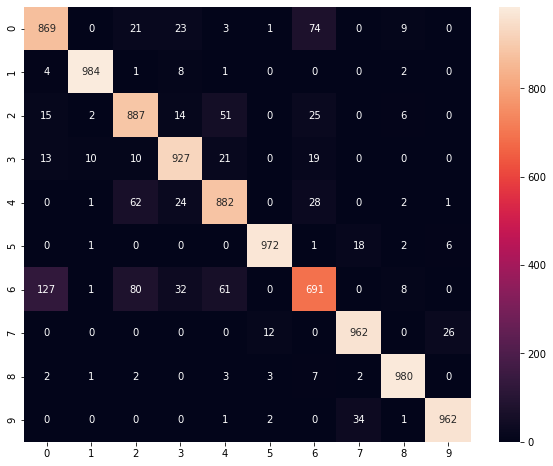

In [64]:
cm=confusion_matrix(y_test,y_pred_1)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='0g')

In [65]:
print(classification_report(y_test,y_pred,target_names=class_names))

                      precision    recall  f1-score   support

Class 0: T-shirt/top       0.86      0.83      0.84      1000
    Class 1: Trouser       0.97      0.98      0.98      1000
   Class 2: Pullover       0.90      0.81      0.85      1000
      Class 3: Dress       0.92      0.91      0.92      1000
       Class 4: Coat       0.84      0.89      0.86      1000
     Class 5: Sandal       0.98      0.98      0.98      1000
      Class 6: Shirt       0.72      0.78      0.75      1000
    Class 7: Sneaker       0.94      0.97      0.95      1000
        Class 8: Bag       0.98      0.97      0.98      1000
 Class 9: Ankle boot       0.97      0.95      0.96      1000

            accuracy                           0.91     10000
           macro avg       0.91      0.91      0.91     10000
        weighted avg       0.91      0.91      0.91     10000



#AFter adding the drop feature the train accuracy: 67.74 and cross_val_accuracy: 91.49% and test accuracy is: 91.6%

In [70]:
evaluate=model.evaluate(X_test,y_test)
print('Test Accuracy: {:.5f}'.format(evaluate[1]))
y_pred_1=model.predict_classes(X_test) #remember to user predict class function instead of predict method

10000/10000 [==============================] - 3s 310us/step
Test Accuracy: 0.91690


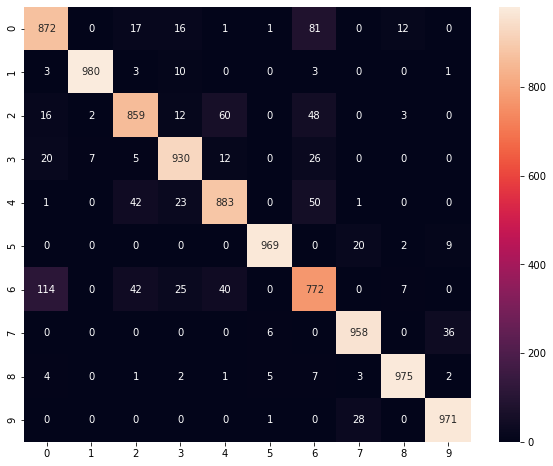

In [71]:
cm=confusion_matrix(y_test,y_pred_1)
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt='0g')

In [72]:
print(classification_report(y_test,y_pred,target_names=class_names))

                      precision    recall  f1-score   support

Class 0: T-shirt/top       0.86      0.83      0.84      1000
    Class 1: Trouser       0.97      0.98      0.98      1000
   Class 2: Pullover       0.90      0.81      0.85      1000
      Class 3: Dress       0.92      0.91      0.92      1000
       Class 4: Coat       0.84      0.89      0.86      1000
     Class 5: Sandal       0.98      0.98      0.98      1000
      Class 6: Shirt       0.72      0.78      0.75      1000
    Class 7: Sneaker       0.94      0.97      0.95      1000
        Class 8: Bag       0.98      0.97      0.98      1000
 Class 9: Ankle boot       0.97      0.95      0.96      1000

            accuracy                           0.91     10000
           macro avg       0.91      0.91      0.91     10000
        weighted avg       0.91      0.91      0.91     10000

